In [2]:
pip install citipy


  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=04294bb53dc18b0f34332d363c6f940477c7808c9c858424598c3dda876b76a5
  Stored in directory: c:\users\lilycshoup\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [23]:
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count = 1
set_count = 1

In [24]:
response = requests.get(f"{url}appid={weather_api_key}&units={units}&q=London")
response_json = response.json()
print(json.dumps(response_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1622694816,
    "id": 2643743,
    "main": {
        "feels_like": 62.35,
        "humidity": 86,
        "pressure": 1017,
        "temp": 62.37,
        "temp_max": 64.26,
        "temp_min": 58.71
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2019646,
        "sunrise": 1622692055,
        "sunset": 1622751006,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 239,
        "gust": 14.25,
        "speed": 4.61
    }
}


In [25]:
for city in cities:
     try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if count <= 50:
            print(f"Processing Record {count} of Set {set_count} | {city}")
            count += 1 
        else:
            count = 0
            set_count += 1
            print(f"Processing Record {count} of Set {set_count} | {city}")
            count += 1  
     except (KeyError, IndexError):
        print("City not found... skipping.")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | mamou
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | thakurgaon
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | codrington
City not found... skipping.
Processing Record 18 of Set 1 | hithadhoo
City not found... skipping.
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | saskylakh
City not found... skipping.
Processing Record 22 of Set 1 | tazovsk

In [26]:
weather_dict = {
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}

In [27]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,58.23,51,100,3.24,AU,1622694685
1,Mamou,10.5000,-12.0000,68.68,94,76,2.53,GN,1622694685
2,Geraldton,-28.7667,114.6000,64.81,55,0,8.48,AU,1622694668
3,San Patricio,28.0170,-97.5169,77.63,89,41,6.06,US,1622694686
4,Ushuaia,-54.8000,-68.3000,26.26,93,0,5.75,AR,1622694686


In [28]:
weather_df.to_csv('weather_data.csv')

In [31]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.

In [29]:
weather_df["Humidity"].max()

100

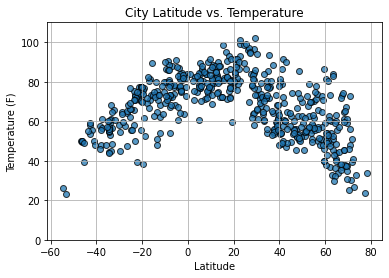

In [33]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o",  alpha=0.75, edgecolor="black")


plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,110)
plt.grid(True)
# saving graph to images
plt.savefig("latitude_vs_temp.png")
plt.show()

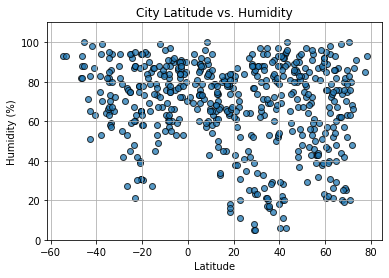

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)
plt.grid(True)
# saving graph to images
plt.savefig("latitude_vs_humidity.png")
plt.show()

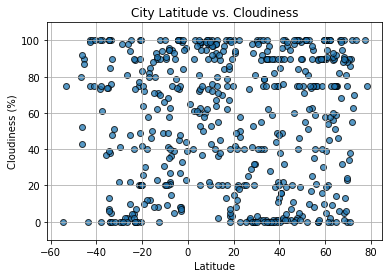

In [37]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,110)
plt.grid(True)
# saving graph to images
plt.savefig("latitude_vs_cloudiness.png")
plt.show()

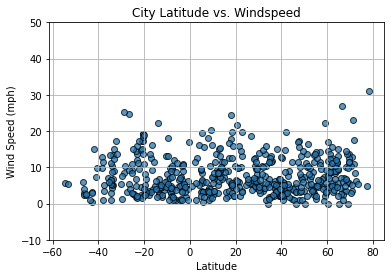

In [38]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o",  alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-10,50)
plt.grid(True)
# saving graph to images
plt.savefig("latitude_vs_windspeed.png")
plt.show()


In [39]:
northern_df = weather_df.loc[(weather_df["Lat"] >= 0)]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mamou,10.5000,-12.0000,68.68,94,76,2.53,GN,1622694685
3,San Patricio,28.0170,-97.5169,77.63,89,41,6.06,US,1622694686
5,Bubaque,11.2833,-15.8333,79.41,79,90,13.60,GW,1622694687
10,Upernavik,72.7868,-56.1549,26.53,87,70,6.31,GL,1622694688
11,Tuktoyaktuk,69.4541,-133.0374,37.40,75,75,13.80,CA,1622694689
...,...,...,...,...,...,...,...,...,...
528,Lukovetskiy,64.2956,41.9211,58.98,54,51,4.63,RU,1622694880
530,Williston,48.1470,-103.6180,74.48,42,84,8.28,US,1622694505
531,Borisoglebskiy,57.2586,39.1508,51.44,59,1,9.51,RU,1622694880
532,Kangāvar,34.5043,47.9653,77.41,21,0,1.28,IR,1622694881


In [40]:
southern_df = weather_df.loc[(weather_df["Lat"] < 0)]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,58.23,51,100,3.24,AU,1622694685
2,Geraldton,-28.7667,114.6000,64.81,55,0,8.48,AU,1622694668
4,Ushuaia,-54.8000,-68.3000,26.26,93,0,5.75,AR,1622694686
6,Avarua,-21.2078,-159.7750,77.05,78,20,2.30,CK,1622694687
7,Busselton,-33.6500,115.3333,68.04,59,76,5.19,AU,1622694687


The r-value is: -0.7249338151592866


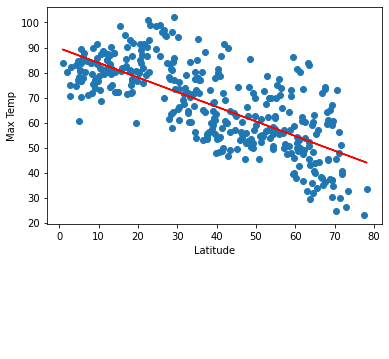

In [42]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

In [43]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7451754236778232


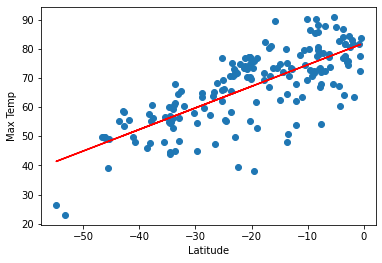

In [44]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

In [45]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.066547265838856


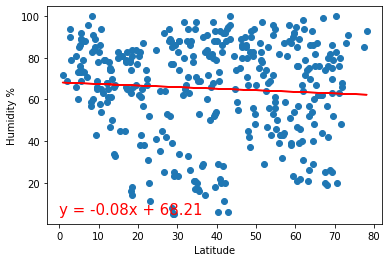

In [46]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

In [47]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.01699355645332806


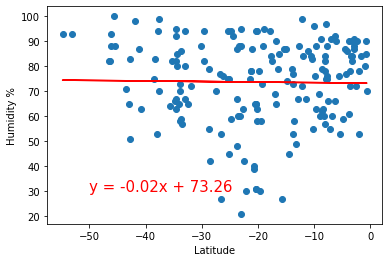

In [48]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

In [49]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.034670271644601194


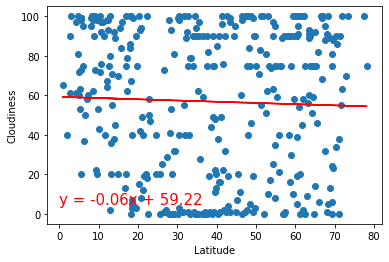

In [50]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03622049359868166


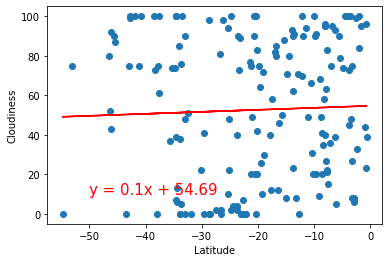

In [51]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

In [52]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.043969898452155924


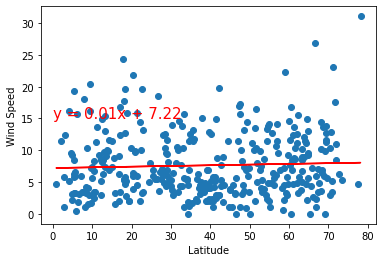

In [53]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

In [54]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.07190110064006806


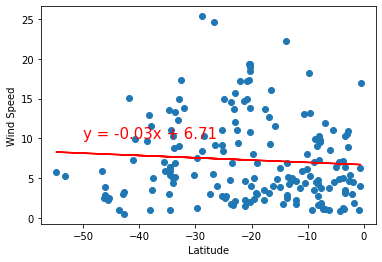

In [55]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()